In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
def get_std_scaled(df=None):
    df_copy = df.copy()
    std_scaler = StandardScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    return df_copy

def get_minmax_scaled(df=None):
    df_copy = df.copy()
    std_scaler = MinMaxScaler()
    df_copy = std_scaler.fit_transform(df_copy)
    return df_copy

In [11]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1_score: {3:.4f}'.format(accuracy, precision, recall, f1))

In [12]:
train_df = pd.read_csv('../EDA&FE/train.csv')
train_df.drop(['ID'], axis=1, inplace=True)
valid_df = pd.read_csv('../EDA&FE/val.csv')
valid_df.drop(['ID'], axis=1, inplace=True)
test_df = pd.read_csv('../EDA&FE/test.csv')
test_df.drop(['ID'], axis=1, inplace=True)
print(train_df.shape, valid_df.shape, test_df.shape)
valid_df[valid_df['Class'] == 1].shape[0] / valid_df.shape[0]

(113842, 30) (28462, 31) (142503, 30)


0.0010540369615627855

In [8]:
lof_clf = LocalOutlierFactor(n_neighbors=40, p=3, novelty=True, contamination='auto', n_jobs=3)
lof_clf.fit(train_df)

LocalOutlierFactor(n_jobs=-1, n_neighbors=40, novelty=True, p=3)

In [9]:
pred_val = lof_clf.predict(valid_df.iloc[:, :-1])

In [10]:
pred_val_edit = np.where(pred_val==1, 0, 1)

In [11]:
get_clf_eval(valid_df['Class'], pred_val_edit)

오차 행렬
[[27532   900]
 [   22     8]]
정확도: 0.9676, 정밀도: 0.0088, 재현율: 0.2667, f1_score: 0.0171


In [ ]:
valid_pred_df = pd.DataFrame(np.concatenate((valid_df.iloc[:, :-1].values, best_pred_edit.reshape(-1, 1)), axis=1), columns = ['tsne_V1', 'tsne_V2', 'Class'])
valid_pred_df.head()

In [ ]:
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].tsne_V1, valid_pred_df[valid_pred_df['Class']==0].tsne_V2, color='green')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].tsne_V1, valid_pred_df[valid_pred_df['Class']==1].tsne_V2, color='red')

plt.show()

In [14]:
lof_clf = LocalOutlierFactor(n_neighbors=20, p=30, novelty=True, contamination='auto', n_jobs=6)
lof_clf.fit(train_df)

LocalOutlierFactor(n_jobs=6, novelty=True, p=30)

In [15]:
pred_val = lof_clf.predict(valid_df.iloc[:, :-1])

In [16]:
pred_val_edit = np.where(pred_val==1, 0, 1)

In [18]:
valid_pred_df = pd.DataFrame(np.concatenate((valid_df.iloc[:, :-1].values, pred_val_edit.reshape(-1, 1)), axis=1), columns = valid_df.columns)
valid_pred_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
1  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038  0.107712   
2  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430  0.531588   
3  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358 -0.427576   
4 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575  2.065426   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.069539 -0.736727 -0.366846  ... -0.633753 -0.120794 -0.385050 -0.069733   
1  0.521502 -1.191311  0.724396  ...  0.402492 -0.048508 -1.371866  0.390814   
2 -0.241888 -0.896287  0.757952  ... -0.119703 -0.076510  0.691320  0.633984   
3  0.615371  0.226278 -0.225495  ...  0.079359  0.096632 -0.992569  0.085096   
4 -1.829347  4.009259  6.051521  ... -0.181268 -0.163747  0.515821  0.136318   

        V26       V27       V28       V29       V30  Class  
0  0.094199  0.246219  0.083076 -0.255991 -0.994878    0.0  
1  0.199964  0.016371 -0.014605  0.168937 -0.994784    0.0  
2  0.048741 -0.053192  0.016251  0.169496 -0.994502    0.0  
3  0.377447  0.036096 -0.005960  0.331307 -0.994467    0.0  
4  0.460054 -0.251259 -1.105751 -0.287012 -0.994373    0.0  

[5 rows x 31 columns]

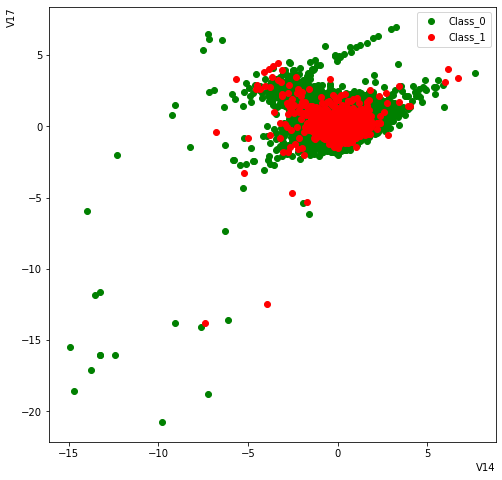

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].V14, valid_pred_df[valid_pred_df['Class']==0].V17, color='green', label= 'Class_0')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].V14, valid_pred_df[valid_pred_df['Class']==1].V17, color='red', label= 'Class_1')
plt.xlabel('V14', loc='right')
plt.ylabel('V17', loc='top')
plt.legend()
plt.show()

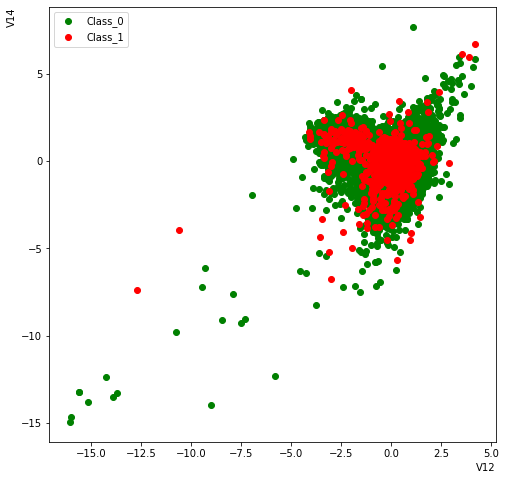

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(valid_pred_df[valid_pred_df['Class']==0].V12, valid_pred_df[valid_pred_df['Class']==0].V14, color='green', label= 'Class_0')
plt.scatter(valid_pred_df[valid_pred_df['Class']==1].V12, valid_pred_df[valid_pred_df['Class']==1].V14, color='red', label= 'Class_1')
plt.xlabel('V12', loc='right')
plt.ylabel('V14', loc='top')
plt.legend()
plt.show()

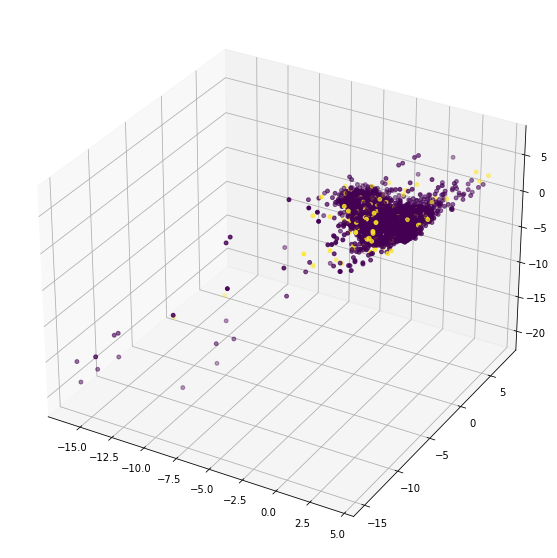

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valid_pred_df.V12, valid_pred_df.V14, valid_pred_df.V17, c=valid_pred_df.Class, marker='o', s=15)

In [28]:
import plotly.express as px

fig = px.scatter_3d(valid_pred_df, x='V12', y='V14', z='V17', color='Class', opacity=0.6)
fig.show()

In [21]:
get_clf_eval(valid_df['Class'], pred_val_edit)

오차 행렬
[[27579   853]
 [   24     6]]
정확도: 0.9692, 정밀도: 0.0070, 재현율: 0.2000, f1_score: 0.0135


In [29]:
pred_test = lof_clf.predict(test_df)

In [30]:
pred_test_edit = np.where(pred_test==1, 0, 1)

In [31]:
test_df = pd.read_csv('../EDA&FE/test.csv')
test_id = test_df['ID'].values.reshape(-1, 1)
final_test_pred = pd.DataFrame(np.concatenate((test_id, pred_test_edit.reshape(-1, 1)), axis=1), columns=['ID', 'Class'])
final_test_pred.head()

ID Class
0  AAAA0x1     0
1  AAAA0x2     0
2  AAAA0x5     0
3  AAAA0x7     0
4  AAAA0xc     0

In [32]:
final_test_pred.to_csv('./test_pred_nei20_p30_auto.csv', index = False)